# Stock Market Prediction using Machine Learning

In this project we are going to predict wether to buy a share or sell it for tomorrow.

## Importing important libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import sklearn

In [56]:
data = quandl.get("NSE/TATAGLOBAL")

## Dataframe Analysis

In [57]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [58]:
cols = ['Last','Turnover (Lacs)']
data = data.drop(columns=cols,axis=1)
data['Volume'] = data['Total Trade Quantity']
data = data.drop(columns=['Total Trade Quantity'])

In [59]:
data['Close - Open'] = data['Close'] - data['Open']
data['High - Low'] = data['High'] - data['Low']

In [60]:
data.head()

,Open,High,Low,Close,Volume,Close - Open,High - Low
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.55,658666.0,-0.55,1.95
2010-07-22,120.3,122.00,120.25,120.90,293312.0,0.60,1.75
2010-07-23,121.8,121.95,120.25,120.65,281312.0,-1.15,1.70
2010-07-26,120.1,121.00,117.10,117.60,658440.0,-2.50,3.90
2010-07-27,117.6,119.50,112.00,118.65,586100.0,1.05,7.50


In [61]:
data['Next day Close'] = data['Close'].shift(-1)
data['Y']=pd.np.where(data['Next day Close']>data['Close'],1,-1)
data = data.drop(columns = ['Next day Close'])
data.head()

/var/folders/49/zq4h7yms78xf47s4w_6n86k80000gn/T/ipykernel_5396/1005529172.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data['Y']=pd.np.where(data['Next day Close']>data['Close'],1,-1)


,Open,High,Low,Close,Volume,Close - Open,High - Low,Y
Date,,,,,,,,
2010-07-21,122.1,123.00,121.05,121.55,658666.0,-0.55,1.95,-1
2010-07-22,120.3,122.00,120.25,120.90,293312.0,0.60,1.75,-1
2010-07-23,121.8,121.95,120.25,120.65,281312.0,-1.15,1.70,-1
2010-07-26,120.1,121.00,117.10,117.60,658440.0,-2.50,3.90,1
2010-07-27,117.6,119.50,112.00,118.65,586100.0,1.05,7.50,-1


### Adding 20 SMA feature

In [62]:
window_size = 20  
data['20 SMA'] = data['Close'].rolling(window=window_size).mean()
data = data.dropna()

### Adding VWAP

In [181]:
def calculate_vwap(data):
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3
    cumulative_volume = data['Volume'].cumsum()
    cumulative_volume_price = (data['Volume'] * typical_price).cumsum()
    vwap = cumulative_volume_price / cumulative_volume
    return vwap

data['VWAP'] = calculate_vwap(data)

data.head()

,Open,High,Low,Close,Volume,Close - Open,High - Low,Y,20 SMA,VWAP,RSI
Date,,,,,,,,,,,
2010-09-23,121.60,124.25,119.90,123.55,1845230.0,1.95,4.35,1,122.8375,122.566667,53.317536
2010-09-24,123.45,127.50,122.85,125.10,2458845.0,1.65,4.65,-1,123.1850,124.042481,56.512141
2010-09-27,126.35,126.90,123.15,123.60,1209662.0,-2.75,3.75,-1,123.4775,124.153826,50.971922
2010-09-28,124.60,125.75,122.05,122.85,799399.0,-1.75,3.70,-1,123.7400,124.077367,37.467700
2010-09-29,123.30,124.75,121.20,121.50,984606.0,-1.80,3.55,-1,123.7900,123.862301,35.802469


## Stock Plot

Text(0.5, 1.0, 'TATAGLOBAL')

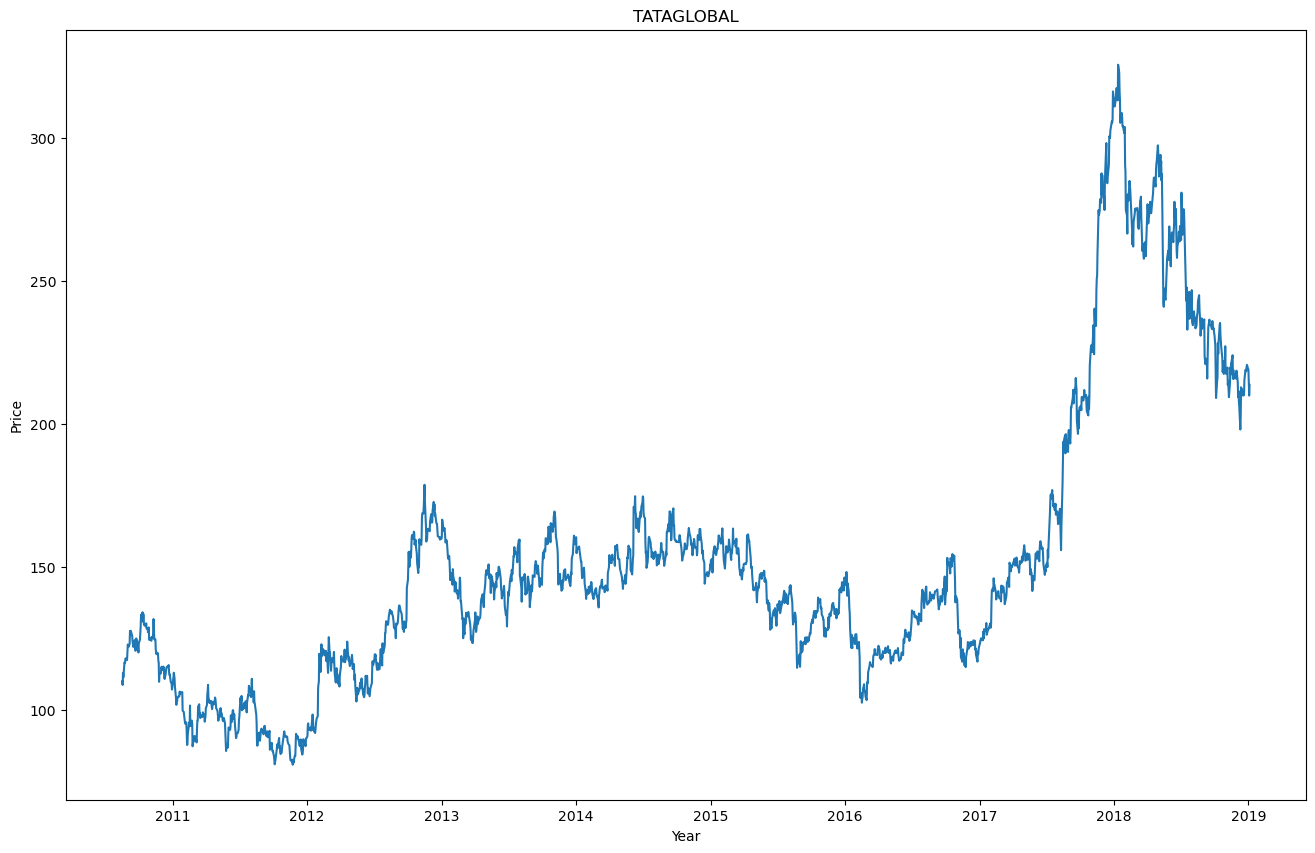

In [63]:
plt.figure(figsize=(16,10))
plt.plot(data['Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('TATAGLOBAL')

## Model Creation

In [151]:
X=data[['Close - Open','High - Low','VWAP']]
y=data['Y']

### Scaling Features

In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Train Test Split

In [169]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [191]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

### Choosing a K Value

In [192]:
error_rate = []

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

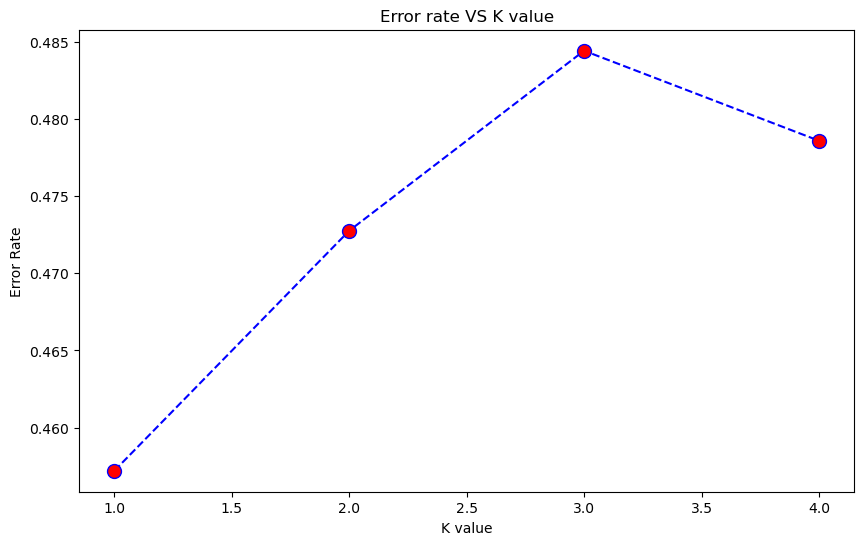

In [193]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.title('Error rate VS K value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

According to graph, least error is at K=14, so 14 is taken as K.

### Final model

In [194]:
knn = KNeighborsClassifier(n_neighbors=1)

In [195]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [196]:
predictions = knn.predict(X_test)

### Model Analysis

In [197]:
accuracy_score(y_test,predictions) 

0.5428015564202334

In [198]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.54      0.54      0.54       253
           1       0.55      0.55      0.55       261

    accuracy                           0.54       514
   macro avg       0.54      0.54      0.54       514
weighted avg       0.54      0.54      0.54       514



So we have created a model having 54 percent accuracy rate.


We can set risk to reward ratio to 1:2 to cut the losses made due to this model

# Thank You